In [1]:
!pip install graphviz --upgrade

Requirement already up-to-date: graphviz in c:\dev\anaconda3\lib\site-packages (0.14)


In [2]:
!pip install hiddenlayer

In [171]:
import numpy as np
import torch
import pandas as pd
import hiddenlayer as hl
import matplotlib.pyplot as plt
import seaborn

In [172]:
df = pd.read_csv('C:\\Hims\\Misc\\bike_sharing_demand.csv',parse_dates=['datetime'])
df.set_index('datetime', inplace=True, drop=True)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
datetime,,,,,,,,
2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [173]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,1.191987,0.040067,0.649416,1.595993,10.602504,12.968531,61.642738,14.108880
std,0.394192,0.196280,0.477552,0.696660,4.593686,5.302457,18.947805,8.711015
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,21.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,7.380000,9.850000,47.000000,7.001500
50%,1.000000,0.000000,1.000000,1.000000,9.840000,12.880000,60.000000,12.998000
75%,1.000000,0.000000,1.000000,2.000000,13.940000,15.910000,75.000000,19.001200
max,2.000000,1.000000,1.000000,4.000000,23.780000,27.275000,100.000000,54.002000


In [174]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [177]:
X_train_tns = torch.tensor(X_train.values, dtype=torch.float)
X_test_tns = torch.tensor(X_test.values, dtype=torch.float)
y_train_tns = torch.tensor(y_train.values, dtype=torch.float)
y_test_tns = torch.tensor(y_test.values, dtype=torch.float)
y_train_tns = y_train_tns.view(-1,1)

print(X_train_tns.size())
print(y_train_tns.size())

torch.Size([479, 7])
torch.Size([479, 1])


In [178]:
import torch.utils.data as util

In [179]:
train_data = util.TensorDataset(X_train_tns,y_train_tns)
train_loader = util.DataLoader(train_data, batch_size=100,shuffle=True)
len(train_loader)

5

In [180]:
feature_batch, target_batch = iter(train_loader).next()

In [181]:
inp = X_train_tns.shape[1]
hid = 10
out = 1
loss_fn = torch.nn.MSELoss()

In [182]:
model = torch.nn.Sequential(torch.nn.Linear(inp,hid),
                            torch.nn.Linear(hid,out))


(dot.exe:47032): Pango-WARNING **: couldn't load font "Times Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


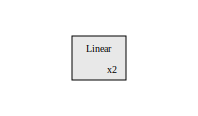

In [184]:
hl.build_graph(model, torch.zeros([10,inp]))

In [185]:
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [186]:
total_steps = len(train_loader)

epochs = 10000

for epoch in range(epochs+1):
    for i, (feature,target) in enumerate(train_loader):

        y_pred = model(feature)
        y_pred = y_pred.clamp(min=0)
        loss = loss_fn(y_pred, target)

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        if epoch % 2000 == 0:
            print (f'Epoch [{epoch+1}/{epochs}], Step[{i+1}/{total_steps}, Loss: {loss.item()}')

Epoch [1/10000], Step[1/5, Loss: 247.2770538330078
Epoch [1/10000], Step[2/5, Loss: 201.32952880859375
Epoch [1/10000], Step[3/5, Loss: 258.6621398925781
Epoch [1/10000], Step[4/5, Loss: 161.0139923095703
Epoch [1/10000], Step[5/5, Loss: 188.50013732910156
Epoch [2001/10000], Step[1/5, Loss: 26.532224655151367
Epoch [2001/10000], Step[2/5, Loss: 25.927101135253906
Epoch [2001/10000], Step[3/5, Loss: 39.275691986083984
Epoch [2001/10000], Step[4/5, Loss: 23.010225296020508
Epoch [2001/10000], Step[5/5, Loss: 20.271251678466797
Epoch [4001/10000], Step[1/5, Loss: 35.424015045166016
Epoch [4001/10000], Step[2/5, Loss: 20.640947341918945
Epoch [4001/10000], Step[3/5, Loss: 17.722984313964844
Epoch [4001/10000], Step[4/5, Loss: 19.184839248657227
Epoch [4001/10000], Step[5/5, Loss: 46.37931823730469
Epoch [6001/10000], Step[1/5, Loss: 23.76244354248047
Epoch [6001/10000], Step[2/5, Loss: 22.694385528564453
Epoch [6001/10000], Step[3/5, Loss: 21.276655197143555
Epoch [6001/10000], Step[4/5, 

In [187]:
model.eval()

Sequential(
  (0): Linear(in_features=7, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)

In [191]:
with torch.no_grad():
    y_pred = model(X_test_tns)
y_pred = y_pred.clamp(min=0)
y_pred = y_pred.detach().numpy()
y_pred

array([[25.93603  ],
       [ 0.       ],
       [12.495147 ],
       [19.196716 ],
       [19.584993 ],
       [21.044048 ],
       [26.724821 ],
       [17.225704 ],
       [13.056527 ],
       [20.369717 ],
       [18.300186 ],
       [23.384918 ],
       [ 8.515203 ],
       [25.106459 ],
       [19.211351 ],
       [20.223263 ],
       [21.973814 ],
       [ 9.086862 ],
       [11.4382305],
       [27.331268 ],
       [10.879747 ],
       [20.218607 ],
       [ 8.4789505],
       [19.473854 ],
       [15.278333 ],
       [ 8.89144  ],
       [18.383244 ],
       [ 0.       ],
       [25.92725  ],
       [11.279662 ],
       [14.470589 ],
       [ 0.       ],
       [14.663046 ],
       [10.3201   ],
       [ 8.105544 ],
       [10.270743 ],
       [22.788713 ],
       [11.419128 ],
       [17.473703 ],
       [16.654343 ],
       [ 6.3767114],
       [ 9.875449 ],
       [23.37035  ],
       [15.622002 ],
       [23.263004 ],
       [13.676106 ],
       [ 4.98171  ],
       [10.08

In [192]:
result = pd.DataFrame({'Actual':np.squeeze(y_test),'Predicted':np.squeeze(y_pred)})
result.head()

,Actual,Predicted
datetime,,
2011-02-28 01:00:00,23.9994,25.936029
2011-01-24 08:00:00,0.0000,0.000000
2011-02-23 01:00:00,11.0014,12.495147
2011-01-21 00:00:00,16.9979,19.196716
2011-03-21 14:00:00,15.0013,19.584993


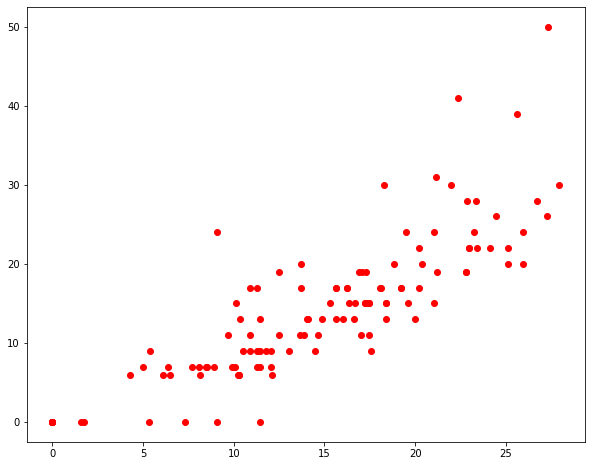

In [193]:
plt.figure(figsize=(10,8))
plt.scatter(y_pred,y_test.values,c='r')
plt.show()